In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import keras
from keras.utils import to_categorical

2024-06-02 17:02:08.765671: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 17:02:08.765804: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 17:02:08.949402: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load Data

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
trainData = unpickle('/kaggle/input/cifar100/train')

#type of items in each file
for item in trainData:
    print(item, type(trainData[item]))

b'filenames' <class 'list'>
b'batch_label' <class 'bytes'>
b'fine_labels' <class 'list'>
b'coarse_labels' <class 'list'>
b'data' <class 'numpy.ndarray'>


In [6]:
print(len(trainData[b'data']))
print(len(trainData[b'data'][0]))

50000
3072


In [8]:
print(np.unique(trainData[b'fine_labels']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [10]:
print(np.unique(trainData[b'coarse_labels']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [11]:
print(trainData[b'batch_label'])

print(len(trainData[b'filenames']))

b'training batch 1 of 1'
50000


In [12]:
#testData
testData = unpickle('/kaggle/input/cifar100/test')
#metaData
metaData = unpickle('/kaggle/input/cifar100/meta')

In [14]:
#storing coarse labels along with its number code in a dataframe
category = pd.DataFrame(metaData[b'coarse_label_names'], columns=[b'SuperClass'])
category

,b'SuperClass'
0,b'aquatic_mammals'
1,b'fish'
2,b'flowers'
3,b'food_containers'
4,b'fruit_and_vegetables'
5,b'household_electrical_devices'
6,b'household_furniture'
7,b'insects'
8,b'large_carnivores'
9,b'large_man-made_outdoor_things'


In [16]:
#storing fine labels along with its number code in a dataframe
subCategory = pd.DataFrame(metaData[b'fine_label_names'], columns=[b'SubClass'])
subCategory

,b'SubClass'
0,b'apple'
1,b'aquarium_fish'
2,b'baby'
3,b'bear'
4,b'beaver'
...,...
95,b'whale'
96,b'willow_tree'
97,b'wolf'
98,b'woman'


In [17]:
X_train = trainData[b'data']
X_train

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

In [18]:
#4D array input for building the CNN model using Keras
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)
#X_train

## Exploring the Images in the Dataset

Image number selected : 34133
Shape of image : (32, 32, 3)
Image category number: 8
Image category name: b'Large_carnivores'
Image subcategory number: 88
Image subcategory name: b'Tiger'


/tmp/ipykernel_33/4074617551.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Image category name: {}".format(category.iloc[trainData[b'coarse_labels'][imageId]][0].capitalize()))
/tmp/ipykernel_33/4074617551.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Image subcategory name: {}".format(subCategory.iloc[trainData[b'fine_labels'][imageId]][0].capitalize()))


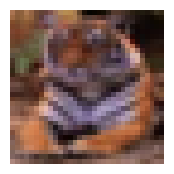

In [20]:
#generating a random number to display a random image from the dataset along with the label's number and name

rcParams['figure.figsize'] = 2,2

imageId = np.random.randint(0, len(X_train))

plt.imshow(X_train[imageId])

plt.axis('off')

print("Image number selected : {}".format(imageId))
print("Shape of image : {}".format(X_train[imageId].shape))
print("Image category number: {}".format(trainData[b'coarse_labels'][imageId]))
print("Image category name: {}".format(category.iloc[trainData[b'coarse_labels'][imageId]][0].capitalize()))
print("Image subcategory number: {}".format(trainData[b'fine_labels'][imageId]))
print("Image subcategory name: {}".format(subCategory.iloc[trainData[b'fine_labels'][imageId]][0].capitalize()))

/tmp/ipykernel_33/2579203529.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i,j].set_title(subCategory.iloc[trainData[b'fine_labels'][imageId[k]]][0].capitalize())


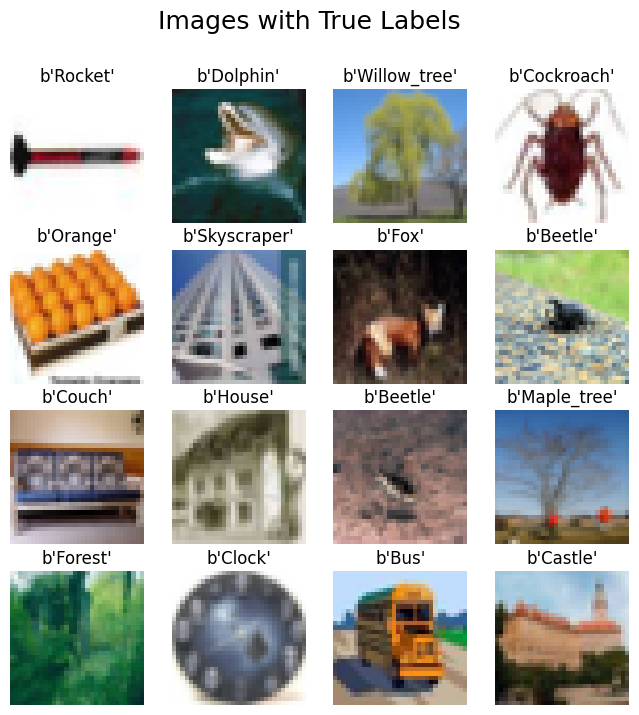

In [22]:
#16 random images to display at a time along with their true labels
rcParams['figure.figsize'] = 8,8

num_row = 4
num_col = 4

#to get 4 * 4 = 16 images together
imageId = np.random.randint(0, len(X_train), num_row * num_col)
#imageId

fig, axes = plt.subplots(num_row, num_col)
plt.suptitle('Images with True Labels', fontsize=18)

for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col)+j
        axes[i,j].imshow(X_train[imageId[k]])
        axes[i,j].set_title(subCategory.iloc[trainData[b'fine_labels'][imageId[k]]][0].capitalize())
        axes[i,j].axis('off')